# Worksheet 18

Name:  Houjie Jiang  
UID: U65333668  

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

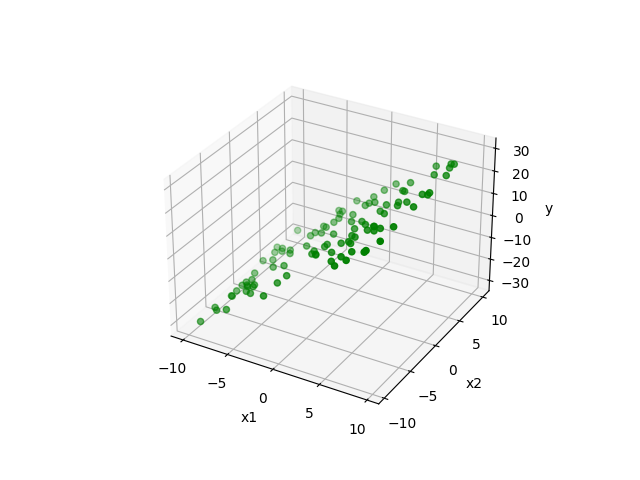

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

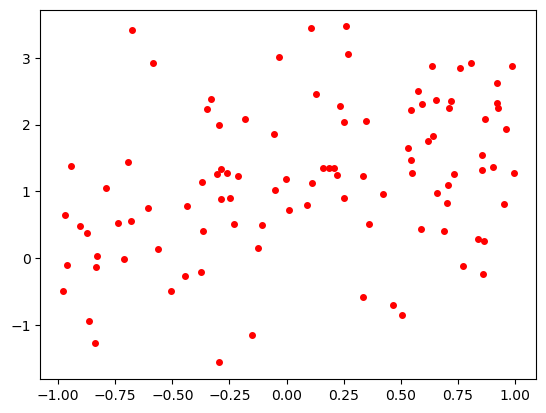

In [10]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([1, 0.5])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

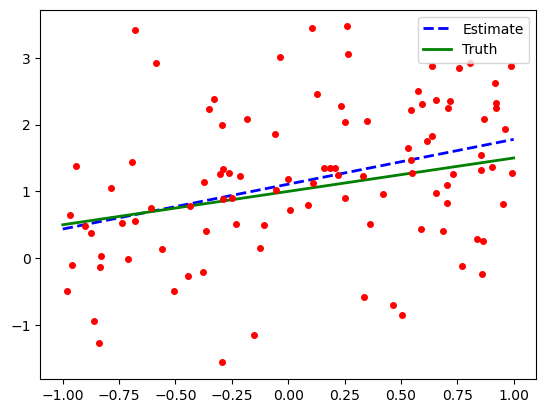

In [11]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

- they are very close to each other

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

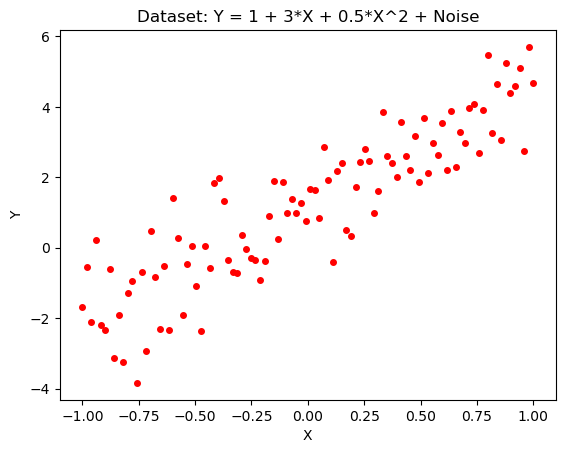

In [13]:
SAMPLE_SIZE = 100

x = np.linspace(-1, 1, SAMPLE_SIZE)

y = 1 + 3 * x + 0.5 * x**2 + np.random.randn(SAMPLE_SIZE)

plt.plot(x, y, 'ro', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset: Y = 1 + 3*X + 0.5*X^2 + Noise')
plt.show()

e) Plot the least squares estimate line through the scatter plot.

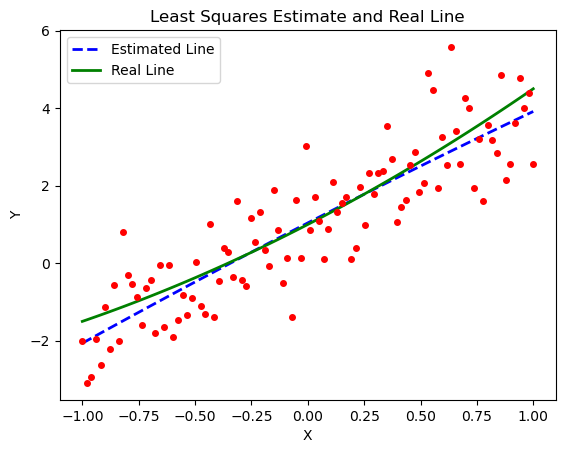

In [15]:
SAMPLE_SIZE = 100

x = np.linspace(-1, 1, SAMPLE_SIZE)

y = 1 + 3 * x + 0.5 * x**2 + np.random.randn(SAMPLE_SIZE)

X = np.vstack((np.ones_like(x), x, x**2)).T

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1, 1, 100)
X_plot = np.vstack((np.ones_like(x_plot), x_plot, x_plot**2)).T
y_est = X_plot @ beta_hat

y_real = 1 + 3 * x_plot + 0.5 * x_plot**2

plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimated Line')
plt.plot(x_plot, y_real, 'g-', lw=2, label='Real Line')
plt.plot(x, y, 'ro', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Squares Estimate and Real Line')
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

- they are pretty close

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

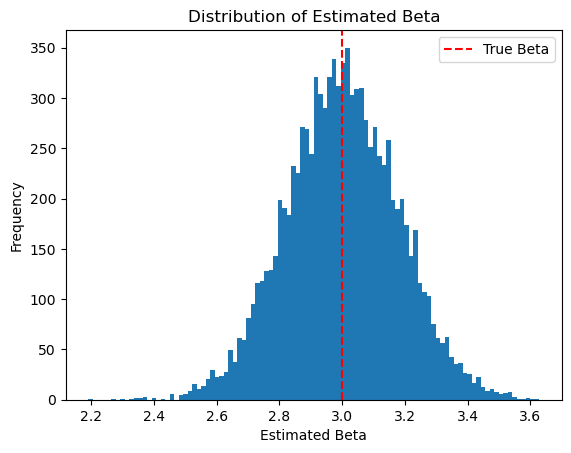

In [18]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 3, 0.5])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat[1])

plt.hist(betas, bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True Beta')
plt.xlabel('Estimated Beta')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Beta')
plt.legend()
plt.show()

- estimated beta looks like normal distribution, centering around real beta